In [11]:
import tensorflow as tf
from tensorflow.keras import datasets,models,layers
from tensorflow.keras.optimizers import SGD

In [2]:
(x_train,y_train),(x_test,y_test)=datasets.cifar10.load_data()

In [3]:
x_train.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_train=x_train/255.0
x_test=x_test/255.0

x_train=x_train.reshape(-1,32*32*3)
x_test=x_test.reshape(-1,32*32*3)

One-hot encoding is a way of representing categorical data in a binary format suitable for machine learning models, especially in classification tasks. In this encoding, each class or category is represented by a binary vector where:

The vector length equals the number of classes.
Only one element is "1" (hot), corresponding to the class label, while all other elements are "0".
For instance, in CIFAR-10, which has 10 classes, the labels for classes might look like this after one-hot encoding:

Class	Label	One-Hot Encoded Label
Airplane	0	[1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Automobile	1	[0, 1, 0, 0, 0, 0, 0, 0, 0, 0]
Bird	2	[0, 0, 1, 0, 0, 0, 0, 0, 0, 0]
...	...	...
Truck	9	[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
Why One-Hot Encoding is Used Here
In a classification task where we use categorical cross-entropy loss, one-hot encoding is necessary for several reasons:

Compatibility with Loss Function: Categorical cross-entropy loss calculates the difference between the predicted probabilities and the actual labels. It requires the true labels to be in one-hot format to perform a comparison across all classes simultaneously.

In [12]:
# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [13]:
x_train[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

In [20]:
model=models.Sequential()


model.add(layers.Dense(128,activation='relu',input_shape=(32*32*3,)))

model.add(layers.Dense(64,activation='relu'))

model.add(layers.Dense(10,activation='softmax'))

model.compile(optimizer=SGD(learning_rate=0.01),loss='categorical_crossentropy',metrics=['accuracy'])

history=model.fit(x_train,y_train,batch_size=32,epochs=30)

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.2653 - loss: 2.0182
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3815 - loss: 1.7366
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4191 - loss: 1.6477
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4341 - loss: 1.5901
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4568 - loss: 1.5388
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4636 - loss: 1.5099
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4738 - loss: 1.4773
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4847 - loss: 1.4520
Epoch 9/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4955 - loss: 1.4266
Epoch 10/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5009 - loss: 1.4089
Epoch 11/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5091 - loss: 1.3930
Epoch 12/30
1563/1563 ━━━━━━━━

In [21]:
test_loss,test_accuracy=model.evaluate(x_test,y_test)
print(test_loss)
print(test_accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5050 - loss: 1.4061
1.4159868955612183
0.5059999823570251


In [22]:
predicted_value=model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [23]:
x_test=x_test.reshape(-1,32,32,3)

[1.6074548e-02 9.6832342e-02 6.0947693e-04 1.7484203e-03 2.2482149e-04
 3.1441450e-04 1.2591765e-04 6.7001656e-03 1.0282385e-02 8.6708742e-01]


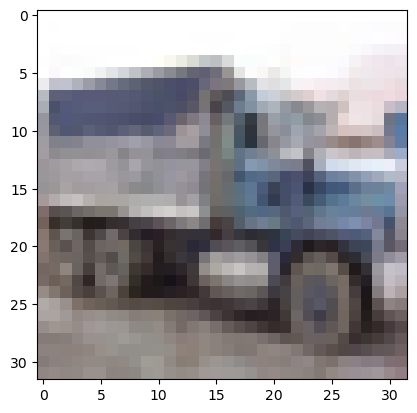

In [42]:
import matplotlib.pyplot as plt
import random

n=random.randint(0,len(x_test)-1)
plt.imshow(x_test[n])
print(predicted_value[n])

#The output you’re seeing is a probability distribution across the 10 CIFAR-10 classes.

In [32]:
# CIFAR-10 class names
class_names = ["airplane", "automobile", "bird", "cat", "deer", 
               "dog", "frog", "horse", "ship", "truck"]

In [43]:
import numpy as np

predicted_class = np.argmax(predicted_value[n])  # Get the index of the highest probability
predicted_class_name = class_names[predicted_class]  # Map to class name

# Display the predicted class name
print("Predicted class:", predicted_class_name)

Predicted class: truck
